<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and data for Kaggle 📚

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use("fivethirtyeight")

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/Kaggle"

In [4]:
! kaggle datasets download -d mosesmoncy/uber-dataset

 71% 5.00M/7.04M [00:00<00:00, 44.4MB/s]
100% 7.04M/7.04M [00:00<00:00, 57.9MB/s]


In [5]:
!unzip '/content/uber-dataset.zip' && rm '/content/uber-dataset.zip'

Archive:  /content/uber-dataset.zip
  inflating: uber.csv                


In [71]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/uber.csv')
data.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


#Explore Data 🕵️‍♂️

In [72]:
data.shape

(200000, 9)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [74]:
np.round(data.describe(),2)

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.00,200000.00,200000.00,200000.00,199999.00,199999.00,200000.00
mean,27712503.68,11.36,-72.53,39.94,-72.53,39.92,1.68
std,16013822.21,9.90,11.44,7.72,13.12,6.79,1.39
min,1.00,-52.00,-1340.65,-74.02,-3356.67,-881.99,0.00
25%,13825346.25,6.00,-73.99,40.73,-73.99,40.73,1.00
50%,27745495.00,8.50,-73.98,40.75,-73.98,40.75,1.00
75%,41555300.75,12.50,-73.97,40.77,-73.96,40.77,2.00
max,55423567.00,499.00,57.42,1644.42,1153.57,872.70,208.00


In [106]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['Year'] = data['pickup_datetime'].apply(lambda x : x.year).astype(str)
data['Month'] = data['pickup_datetime'].apply(lambda x : x.month).astype(str)
data['Day'] = data['pickup_datetime'].apply(lambda x : x.day).astype(str)
data['Hour'] = data['pickup_datetime'].apply(lambda x : x.hour).astype(str)


data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17


In [76]:
data['Month'] =data['Month'].map({'5':'May', '7':'July', '8':'August', '6':'June',
                                  '2':'February', '10':'October', '12':'December',
                                  '3':'March', '4':'April', '9':'September',
                                  '11':'November', '1':'January'})

In [77]:
df09 = data.query('Year=="2009"')
df10 = data.query('Year=="2010"')
df11 = data.query('Year=="2011"')
df12 = data.query('Year=="2012"')
df13 = data.query('Year=="2013"')
df14 = data.query('Year=="2014"')
df15 = data.query('Year=="2015"')

# Plot Data and look for insights📊

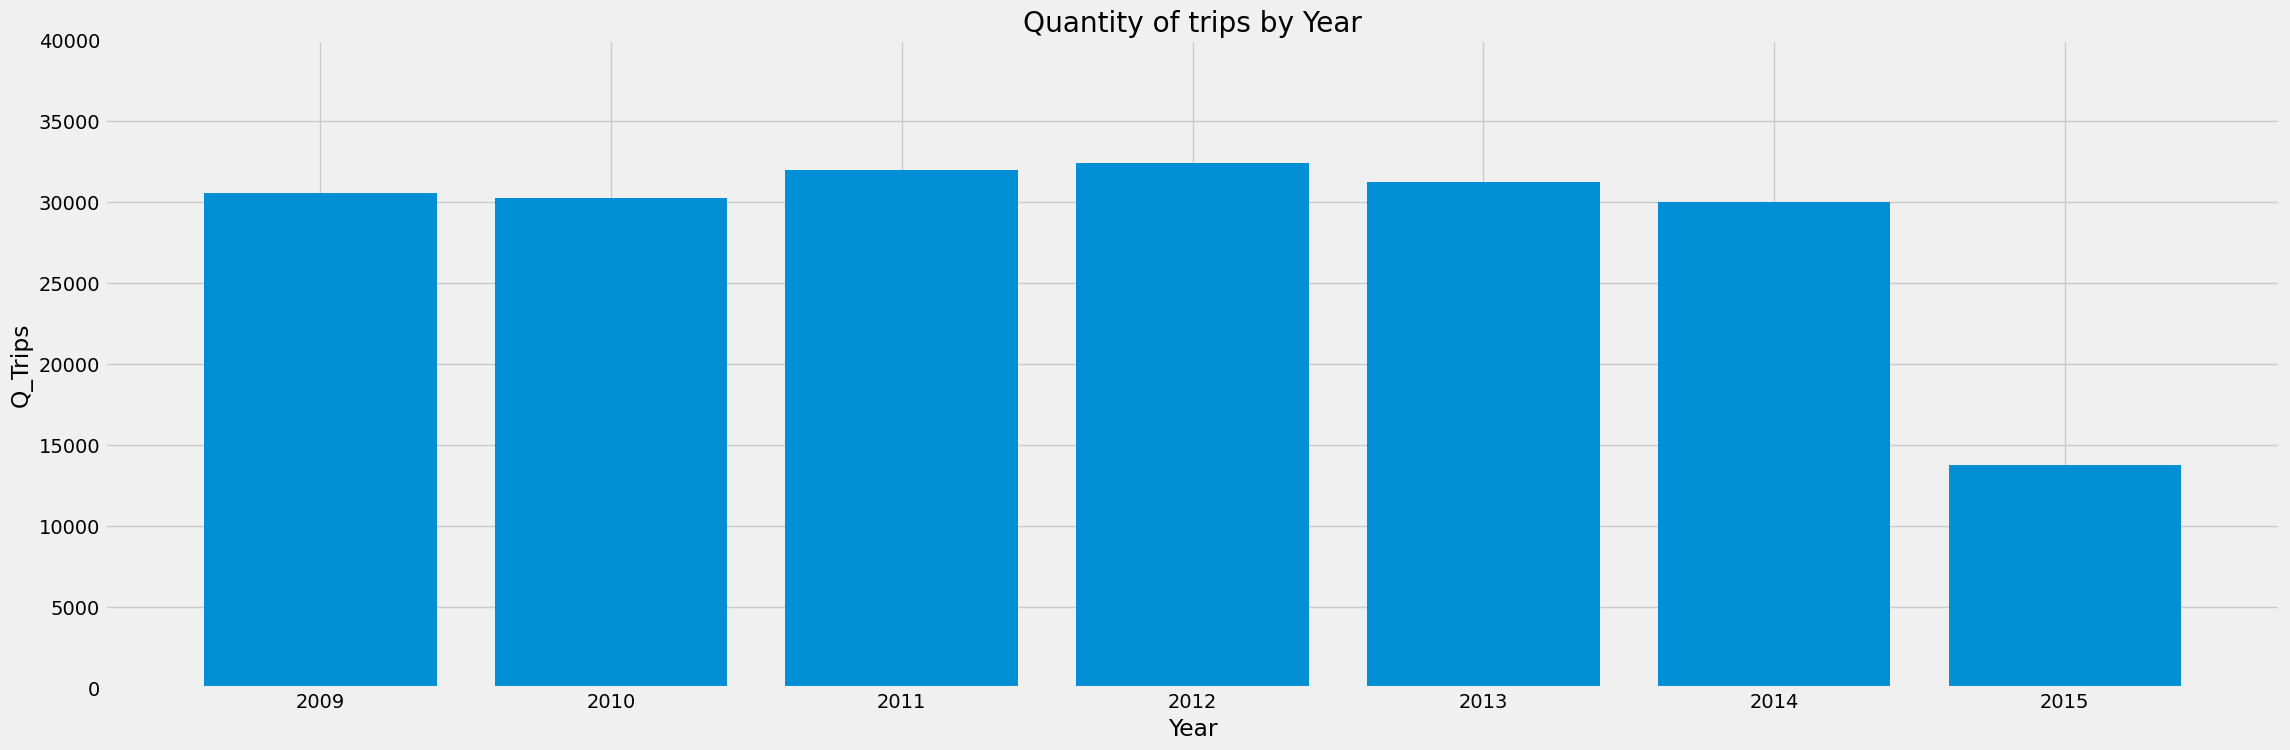

In [78]:
travels = data.groupby(['Year'])['Unnamed: 0'].count()

plt.figure(figsize=(25,8))
plt.bar(travels.index, travels.values,)
plt.xlabel("Year")
plt.ylabel("Q_Trips")
plt.ylim(0,40000)
plt.title("Quantity of trips by Year")
plt.show()

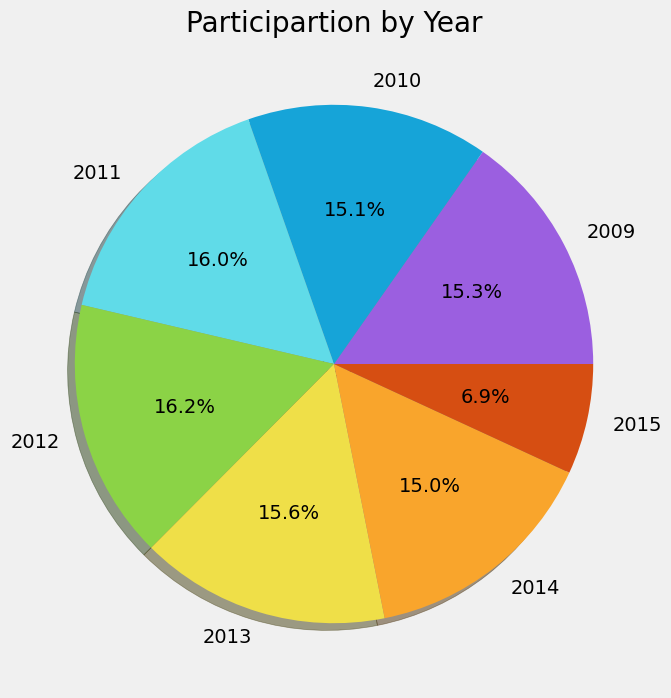

In [79]:
colors =['#9b5fe0','#16a4d8','#60dbe8','#8bd346','#efdf48','#f9a52c','#d64e12']

plt.figure(figsize=(8,8))
plt.pie(x=travels.values, labels=travels.index, shadow=True, autopct="%1.1f%%", colors=colors)
plt.title("Participartion by Year")
plt.show()

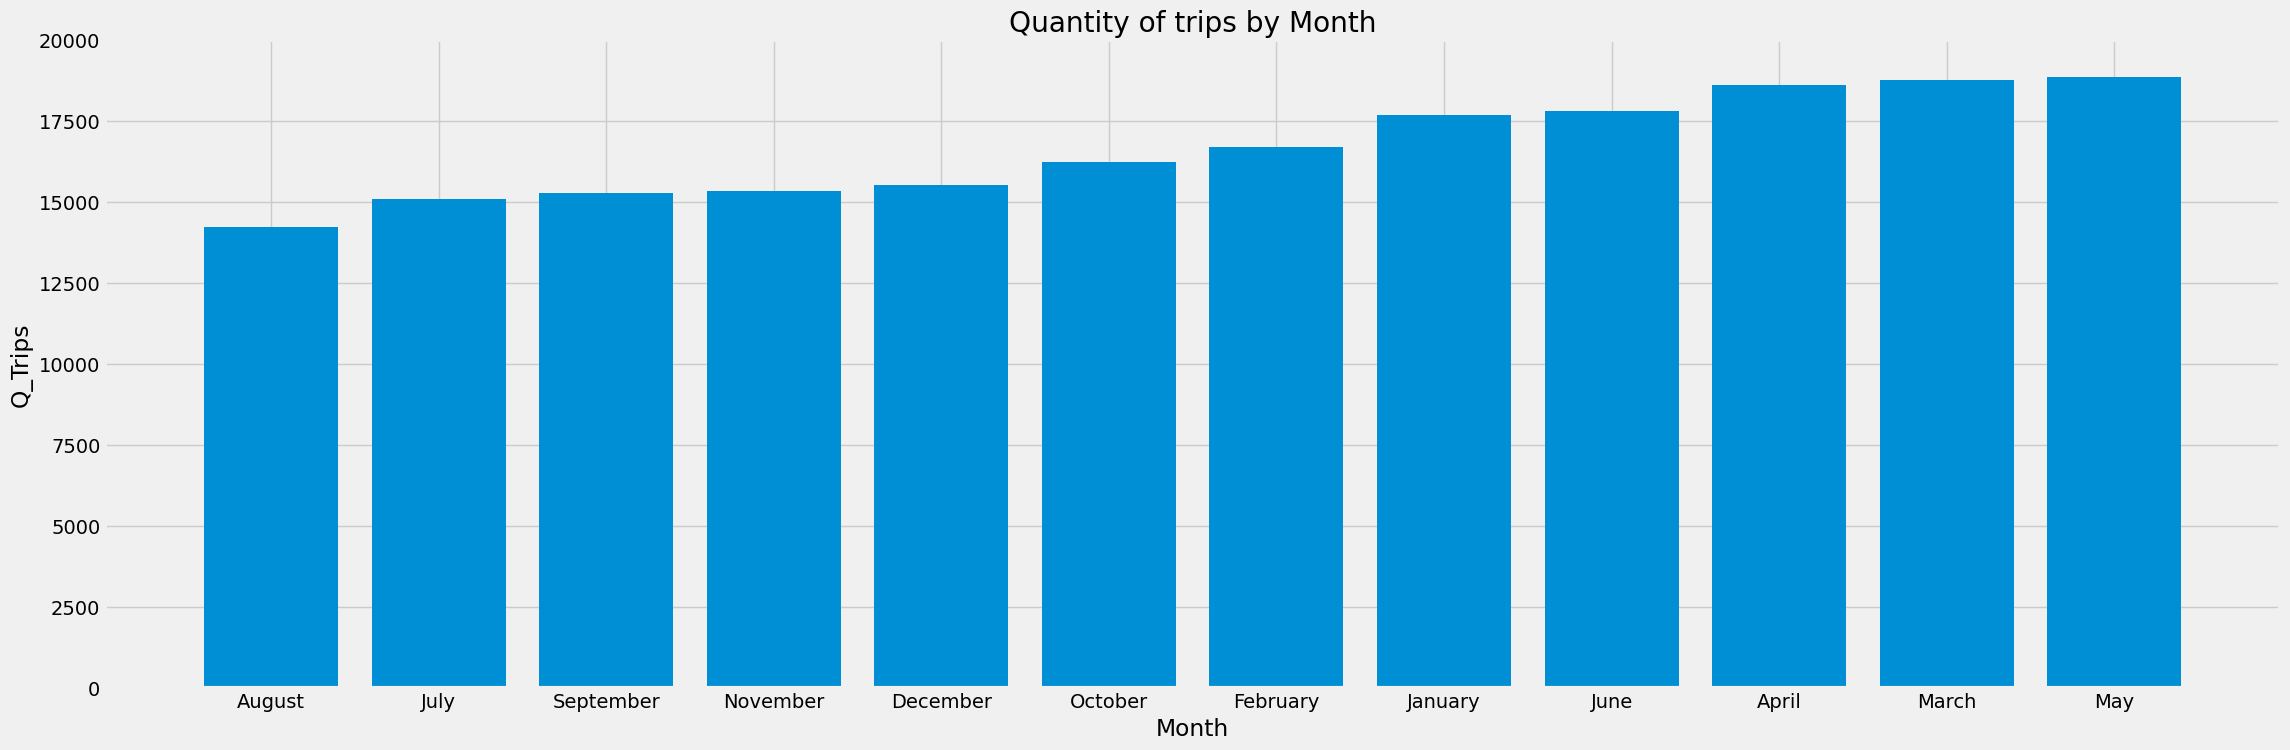

In [80]:
travelsm = data.groupby(['Month'])['fare_amount'].count().sort_values()

plt.figure(figsize=(25,8))
plt.bar(travelsm.index, travelsm.values)
plt.xlabel("Month")
plt.ylabel("Q_Trips")
plt.ylim(0,20000)
plt.title("Quantity of trips by Month")
plt.show()

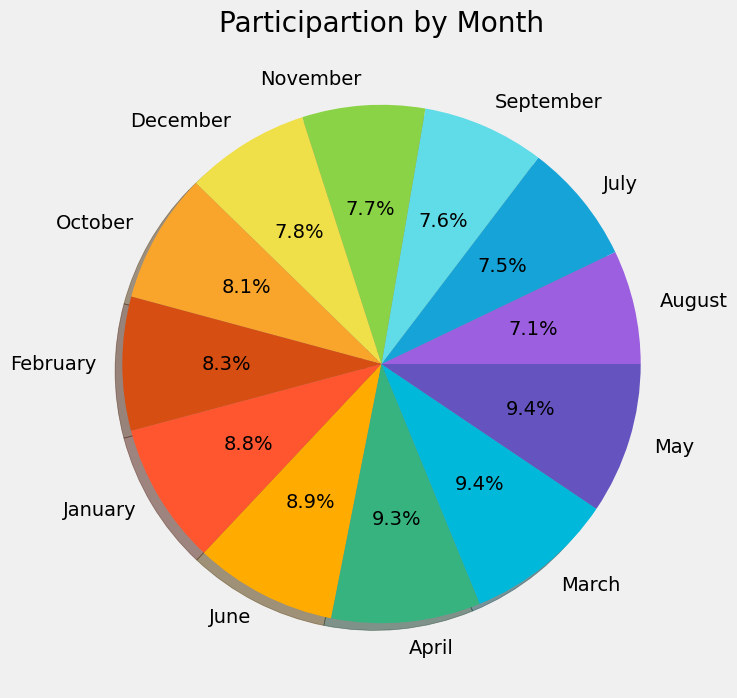

In [81]:
colors =['#9b5fe0','#16a4d8','#60dbe8','#8bd346','#efdf48','#f9a52c','#d64e12',
         	'#ff5630','#ffab00','#36b37e','#00b8d9','#6554c0']

plt.figure(figsize=(8,8))
plt.pie(x=travelsm.values, labels=travelsm.index, shadow=True, autopct="%1.1f%%", colors=colors)
plt.title("Participartion by Month")
plt.show()

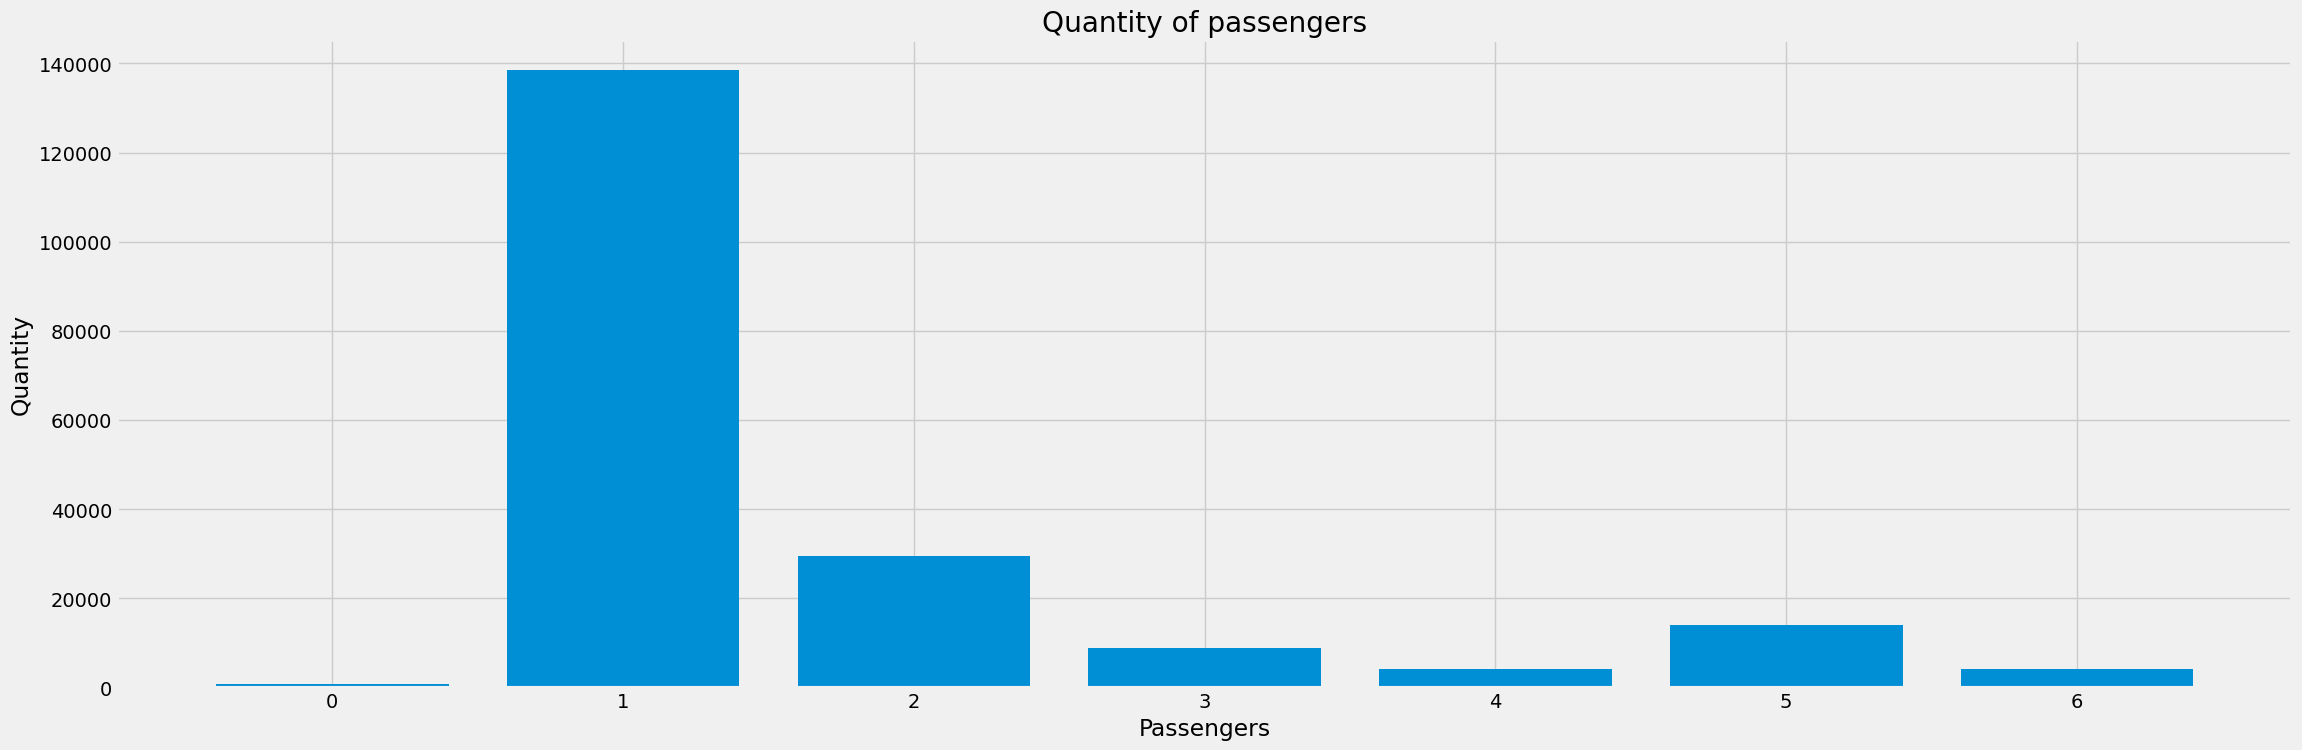

In [82]:
passengers = data.groupby(['passenger_count'])['fare_amount'].count().sort_values().nlargest(7)

plt.figure(figsize=(25,8))
plt.bar(passengers.index, passengers.values)
plt.xlabel("Passengers")
plt.ylabel("Quantity")
plt.title("Quantity of passengers")
plt.show()

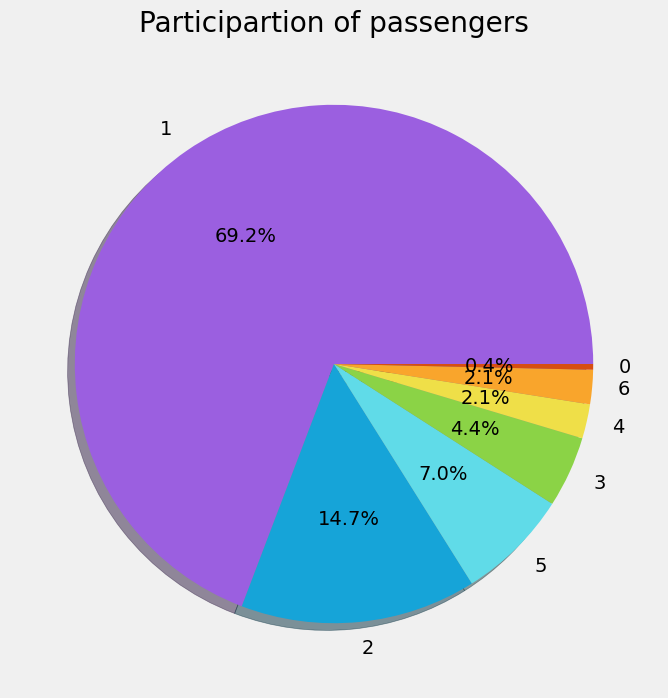

In [83]:
colors =['#9b5fe0','#16a4d8','#60dbe8','#8bd346','#efdf48','#f9a52c','#d64e12',
         	'#ff5630','#ffab00','#36b37e','#00b8d9','#6554c0']

plt.figure(figsize=(8,8))
plt.pie(x=passengers.values, labels=passengers.index, shadow=True, autopct="%1.1f%%", colors=colors)
plt.title("Participartion of passengers")
plt.show()

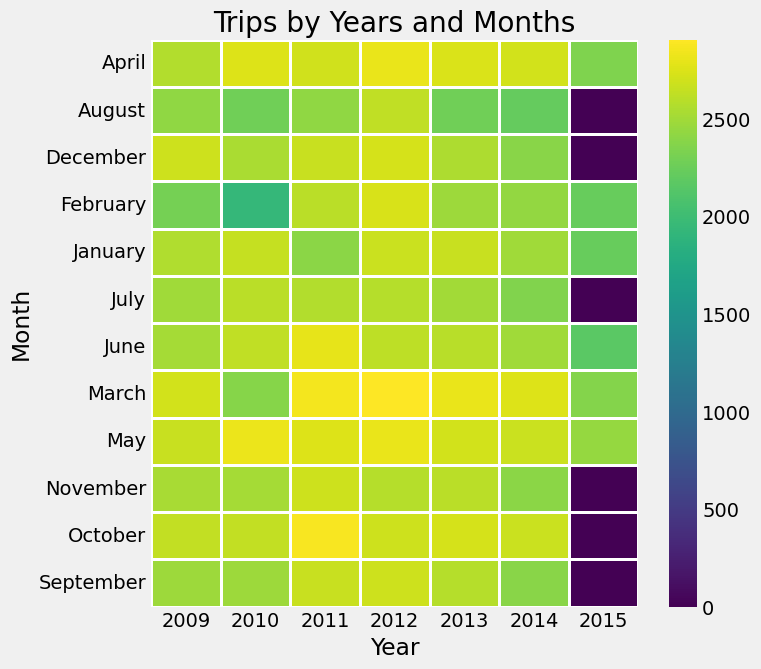

In [105]:
plt.figure(figsize=(7,7))
pv =data.pivot_table(index='Month',columns='Year',values='Unnamed: 0', aggfunc='count', fill_value=0)
sns.heatmap(pv,cmap='viridis', linewidths=1,linecolor='#ffffff' )
plt.title("Trips by Years and Months")
plt.show()

In [85]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'Year', 'Month', 'Day'],
      dtype='object')